Coses inicials

In [32]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
resist="Resistència "
import os
import statsmodels.api as sm


if not os.path.exists("images"):
    os.mkdir("images")

In [14]:
d1=pd.read_csv('d1.csv',sep=';',decimal=",")
d2=pd.read_csv('d2.csv',sep=';',decimal=",")
d2 = d2.dropna(subset=['Tk'])
d2['Tk']=-d2['Tk']
dframes=[d1,d2]
dat=pd.concat(dframes)


In [26]:
d2

,Tk,Rohm,Inc,Inc.1
0,-95.2,58.7,0.1,0.1
1,-89.7,62.5,0.1,0.1
2,-89.1,63.0,0.1,0.1
3,-88.4,63.5,0.1,0.1
4,-87.7,64.0,0.1,0.1
5,-85.9,64.5,0.1,0.1
6,-84.3,65.0,0.1,0.1
9,-80.4,66.5,0.1,0.1
10,-78.5,67.0,0.1,0.1
11,-77.6,67.5,0.1,0.1


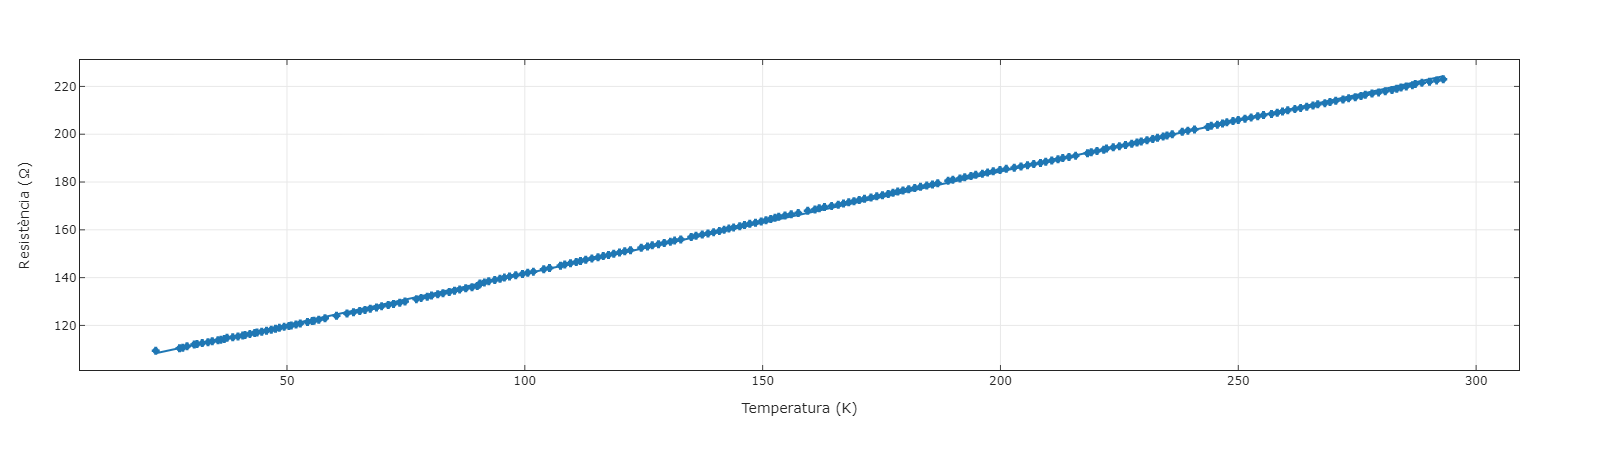

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.486e+05
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        16:34:34   Log-Likelihood:                -194.84
No. Observations:                 223   AIC:                             393.7
Df Residuals:                     221   BIC:                             400.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.7634      0.086   1148.616      0.0

In [22]:
fig=px.scatter(d1,x='Tk',y='Rohm',template='simple_white', trendline="ols",error_x='Inc',error_y='Inc.1',
 labels={
                     "Tk": "Temperatura (K)",
#                      "y": "Resistència $\\text{Resistència }(\Omega)$"
                     "Rohm":resist +"(&#x2126;)"
                 },                
               )
               
fig.update_layout(
    title={
#         'text': "Resistència (&#x2126;) en funció de la temperatura (K)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'bottom'
        })
fig.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                
                )

fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)
fig.write_image("positiu.pdf",engine="kaleido")


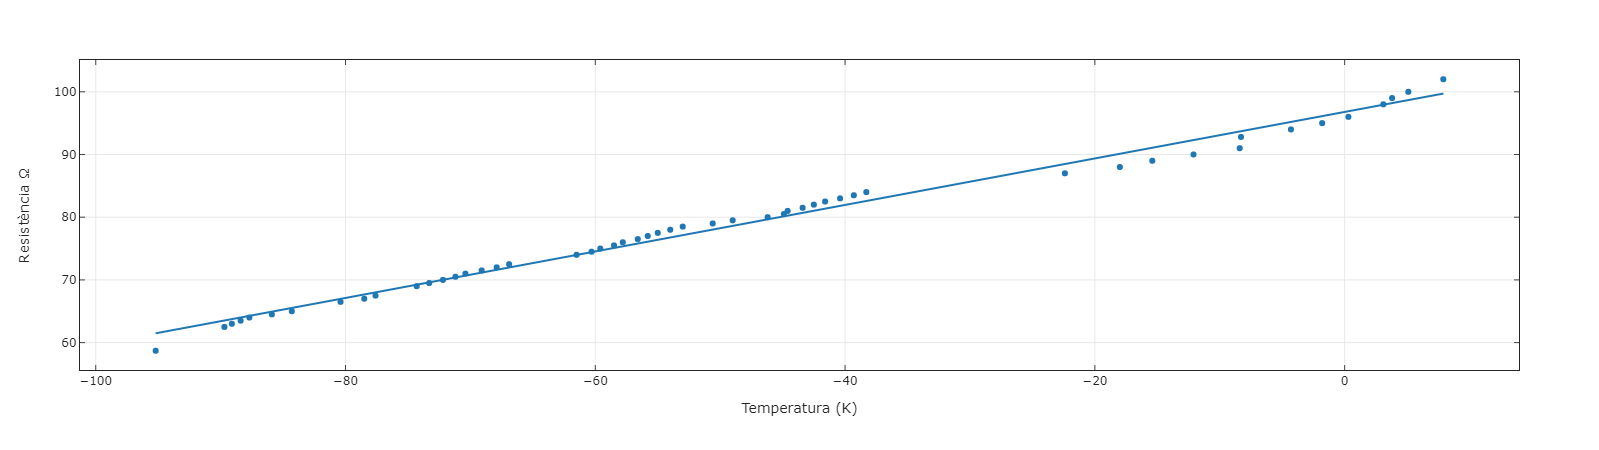

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4761.
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.95e-51
Time:                        21:22:43   Log-Likelihood:                -79.300
No. Observations:                  52   AIC:                             162.6
Df Residuals:                      50   BIC:                             166.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.7870      0.306    315.804      0.0

In [35]:
fig=px.scatter(x=d2.Tk,y=d2.Rohm,template='simple_white', trendline="ols",
 labels={
                     "x": "Temperatura (K)",
#                      "y": "Resistència $\\text{Resistència }(\Omega)$"
                     "y":resist +"&#x2126;"
                 },                
               )
               
fig.update_layout(
    title={
#         'text': "Resistència (&#x2126;) en funció de la temperatura (K)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'bottom'
        })
fig.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                
                )

fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)
fig.write_image("fig1.pdf",engine="kaleido")


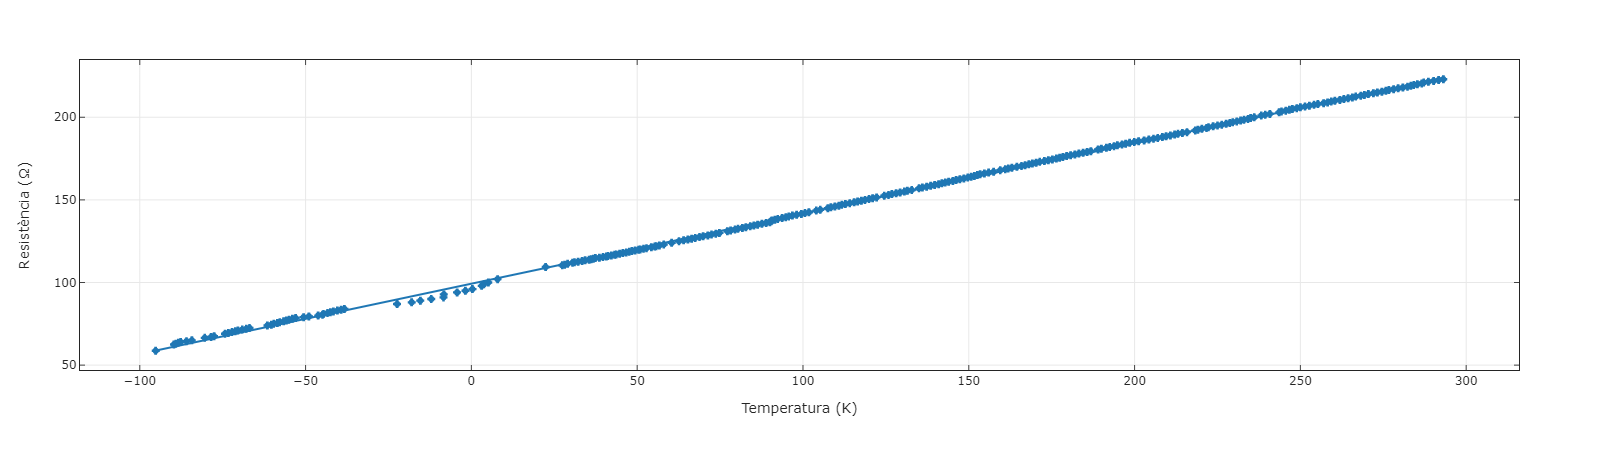

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.497e+05
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        21:14:58   Log-Likelihood:                -395.34
No. Observations:                 275   AIC:                             794.7
Df Residuals:                     273   BIC:                             801.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [31]:
fig=px.scatter(dat,x='Tk',y='Rohm',template='simple_white', trendline="ols",error_x='Inc',error_y='Inc.1',
 labels={
                     "Tk": "Temperatura (K)",
#                      "y": "Resistència $\\text{Resistència }(\Omega)$"
                     "Rohm":resist +"(&#x2126;)"
                 },                
               )
               
# fig.update_layout(
#     title={
#         'text': "Resistència (&#x2126;) en funció de la temperatura (K)",
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'bottom'
#         })
fig.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                
                )

fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)
fig.write_image("tot.pdf",engine="kaleido")


In [5]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3 


Building jupyterlab assets (production, minimized)
An error occured.
RuntimeError: JupyterLab failed to build
See the log file for details:  /tmp/jupyterlab-debug-4xwly2fb.log


In [2]:
!jupyter lab build --dev-build=False --minimize=False


[LabBuildApp] JupyterLab 3.0.14
[LabBuildApp] Building in /opt/conda/share/jupyter/lab
[LabBuildApp] Building jupyterlab assets (production, not minimized)
